In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier

In [3]:
len(os.listdir(r"C:\Users\datma003\Desktop\projects1\retinopathy_images\retinopathy_images\Healthy"))

3326

In [4]:
len(os.listdir(r"C:\Users\datma003\Desktop\projects1\retinopathy_images\retinopathy_images\severe DR"))

3096

In [8]:
healthy_images = os.listdir(r"C:\Users\datma003\Desktop\projects1\retinopathy_images\retinopathy_images\Healthy")

In [10]:
healthy_images[:5]

['aug-_0_3222.png',
 'aug-_0_3223.png',
 'aug-_0_3229.png',
 'aug-_0_3234.png',
 'aug-_0_3235.png']

In [12]:
# augmented_healthy_images = 'augmented_healthy_images'
# augmented_severe_images = 'augmented_severe_images'

# os.makedirs(augmented_healthy_images, exist_ok=True)
# os.makedirs(augmented_severe_images, exist_ok=True)

In [14]:
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True
# )

In [16]:
# for image in healthy_images[:200]:
    
#     image_path = 'retinopathy_images/healthy/' + image
#     img = cv2.imread(str(image_path))
#     img = cv2.resize(img,(180,180))

#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir=augmented_healthy_images, 
#                               save_prefix=f'aug-', 
#                               save_format='png'):
#         i += 1
#         if i > 20:
#             break

In [18]:
severe = os.listdir(r"C:\Users\datma003\Desktop\projects1\retinopathy_images\retinopathy_images\severe DR")

In [20]:
# for image in severe:
    
#     image_path = 'retinopathy_images/severe DR/' + image
#     img = cv2.imread(str(image_path))
#     img = cv2.resize(img,(180,180))

#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir=augmented_severe_images, 
#                               save_prefix=f'aug-', 
#                               save_format='png'):
#         i += 1
#         if i > 20:
#             break

In [22]:
data_dir = r"C:\Users\datma003\Desktop\projects1\retinopathy_images\retinopathy_images"

In [24]:
data_dir=pathlib.Path(data_dir)

In [26]:
health = list(data_dir.glob("healthy/*"))

In [28]:
len(health)

3326

In [30]:
health[:5]

[WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/healthy/aug-_0_3222.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/healthy/aug-_0_3223.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/healthy/aug-_0_3229.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/healthy/aug-_0_3234.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/healthy/aug-_0_3235.png')]

In [32]:
sev = list(data_dir.glob("severe DR/*"))

In [34]:
len(sev)

3096

In [36]:
sev[:5]

[WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/severe DR/aug-_0_0.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/severe DR/aug-_0_1013.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/severe DR/aug-_0_1014.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/severe DR/aug-_0_1016.png'),
 WindowsPath('C:/Users/datma003/Desktop/projects1/retinopathy_images/retinopathy_images/severe DR/aug-_0_1017.png')]

In [38]:
image_dict = {"health":health,"severe":sev}

In [40]:
labels_dict = {"health":0,"severe":1}

In [42]:
X, y = [], []

for name, images in image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        
        try:
            resized_img = cv2.resize(img,(224,224))
            X.append(resized_img)
            y.append(labels_dict[name])
        except:
            print("image couldn't be loaded")

In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
len(X)

6422

In [45]:
len(y)

6422

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [47]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [48]:
X_train_scaled.shape

(5137, 224, 224, 3)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(
    monitor='accuracy',  
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [52]:
model1 = Sequential([
    layers.Conv2D(64, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation='sigmoid')])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

C:\Users\datma003\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model1.fit(X_train_scaled, y_train, epochs=30,callbacks=[early_stopper])

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.7332 - loss: 0.5102
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9084 - loss: 0.2443
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9145 - loss: 0.2172
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.9352 - loss: 0.1559
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.9537 - loss: 0.1252
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.9662 - loss: 0.0958
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.9734 - loss: 0.0747
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9721 - loss: 0.0712
Epoch 9/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9743 - loss: 0.0687
Epoch 10/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9897 - loss: 0.0263
Epoch 11/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9919 - loss: 0.0218
Epoch 12/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 

In [58]:
model1.evaluate(X_test_scaled,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.9590 - loss: 0.3234


[0.26355114579200745, 0.9634241461753845]

In [66]:
model2 = Sequential([
    layers.Conv2D(64, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation='sigmoid')])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model2.fit(X_train_scaled, y_train, epochs=30,callbacks=[early_stopper])

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2166s 13s/step - accuracy: 0.5901 - loss: 0.9601
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2474s 15s/step - accuracy: 0.8683 - loss: 0.3205
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2449s 15s/step - accuracy: 0.9083 - loss: 0.2503
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2362s 15s/step - accuracy: 0.9181 - loss: 0.2057
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2115s 13s/step - accuracy: 0.9398 - loss: 0.1694
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2423s 15s/step - accuracy: 0.9635 - loss: 0.0968
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2475s 15s/step - accuracy: 0.9759 - loss: 0.0580
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2853s 18s/step - accuracy: 0.9790 - loss: 0.0630
Epoch 9/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 2988s 19s/step - accuracy: 0.9361 - loss: 0.1878
Epoch 10/30
 56/161 ━━━━━━━━━━━━━━━━━━━━ 1:15:37 43s/step - accuracy: 0.9812 - loss: 0.0546

In [58]:
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [60]:
base_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_inception.trainable = False

x = base_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
out_inception = Dense(1, activation='sigmoid')(x)

model_inception = Model(inputs=base_inception.input, outputs=out_inception)
model_inception.compile(optimizer='adam',
                        loss=tf.keras.losses.BinaryCrossentropy(),
                        metrics=['accuracy'])

In [62]:
print("Training InceptionV3 Model")
model_inception.fit(X_train_scaled, y_train, epochs=30, callbacks=[early_stopper])

print("Evaluating InceptionV3 Model")
model_inception.evaluate(X_test_scaled, y_test)

Training InceptionV3 Model
Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.8909 - loss: 0.2235
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.9744 - loss: 0.0690
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9811 - loss: 0.0509
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.9864 - loss: 0.0435
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9911 - loss: 0.0231
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.9911 - loss: 0.0228
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9806 - loss: 0.0568
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9903 - loss: 0.0226
Epoch 9/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.9940 - loss: 0.0147
Epoch 10/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - accuracy: 0.9966 - loss: 0.0124
Epoch 11/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 480s 3s/step - accuracy: 0.9929 - loss: 0.0171
Epoch 12/30
16

[0.06410276889801025, 0.9828794002532959]

In [63]:
base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_vgg.trainable = False

x_vgg = base_vgg.output
x_vgg = GlobalAveragePooling2D()(x_vgg)
x_vgg = Dense(256, activation='relu')(x_vgg)
x_vgg = Dropout(0.3)(x_vgg)
x_vgg = Dense(64, activation='relu')(x_vgg)
x_vgg = Dropout(0.2)(x_vgg)
out_vgg = Dense(1, activation='sigmoid')(x_vgg)

model_vgg = Model(inputs=base_vgg.input, outputs=out_vgg)
model_vgg.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

In [65]:
print("Training VGG16 Model")
model_vgg.fit(X_train_scaled, y_train, epochs=10, callbacks=[early_stopper])

print("Evaluating VGG16 Model")
model_vgg.evaluate(X_test_scaled, y_test)

Training VGG16 Model
Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1797s 11s/step - accuracy: 0.9424 - loss: 0.1651
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1810s 11s/step - accuracy: 0.9572 - loss: 0.1206
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1702s 11s/step - accuracy: 0.9641 - loss: 0.1050
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1697s 11s/step - accuracy: 0.9706 - loss: 0.0885
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1642s 10s/step - accuracy: 0.9708 - loss: 0.0729
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1617s 10s/step - accuracy: 0.9721 - loss: 0.0820
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1698s 11s/step - accuracy: 0.9742 - loss: 0.0760
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 2281s 14s/step - accuracy: 0.9802 - loss: 0.0670
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1547s 10s/step - accuracy: 0.9811 - loss: 0.0557
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1395s 9s/step - accuracy: 0.9793 - loss: 0.0592
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
Evalu

[0.11809729039669037, 0.9564202427864075]

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns 

In [67]:
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

   
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [78]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=['Healthy', 'Severe'])
    auc = roc_auc_score(y_test, y_pred)

    print(f"\n{model_name} Classification Report:\n", cr)
    print(f"{model_name} AUC: {auc:.4f}\n")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Severe'], yticklabels=['Healthy', 'Severe'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step

InceptionV3 Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      0.97      0.98       664
      Severe       0.97      1.00      0.98       621

    accuracy                           0.98      1285
   macro avg       0.98      0.98      0.98      1285
weighted avg       0.98      0.98      0.98      1285

InceptionV3 AUC: 0.9834



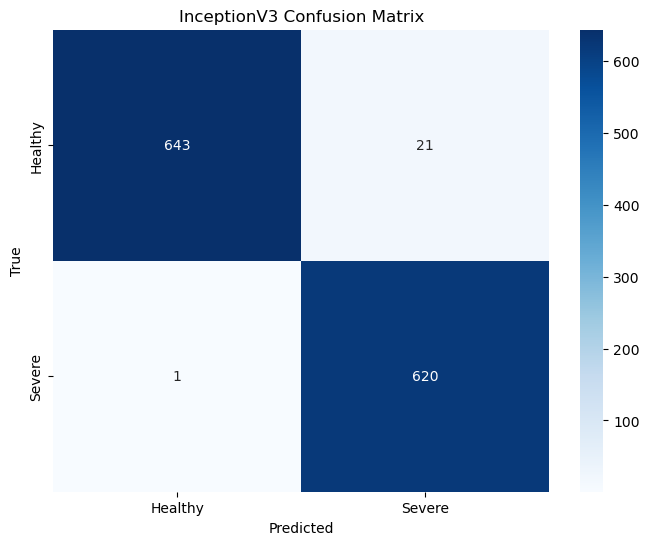

41/41 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step

VGG16 Classification Report:
               precision    recall  f1-score   support

     Healthy       0.98      0.94      0.96       664
      Severe       0.94      0.98      0.96       621

    accuracy                           0.96      1285
   macro avg       0.96      0.96      0.96      1285
weighted avg       0.96      0.96      0.96      1285

VGG16 AUC: 0.9571



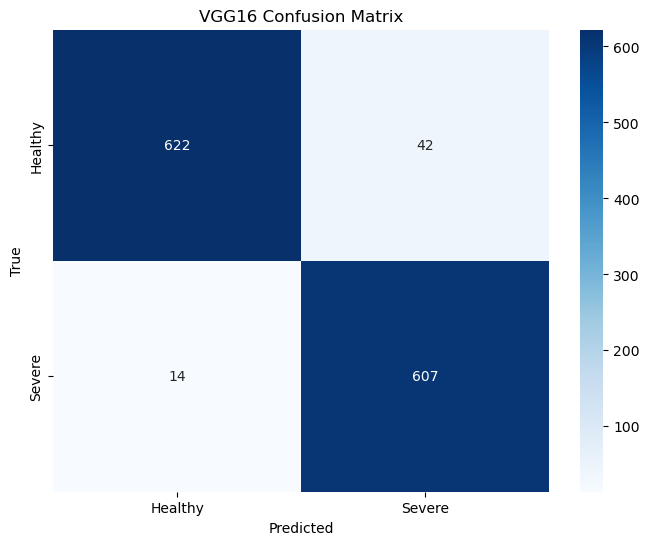

In [80]:
evaluate_model(model_inception, X_test_scaled, y_test, "InceptionV3")
evaluate_model(model_vgg, X_test_scaled, y_test, "VGG16")